In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import pandas as pd

# Problem1

In [5]:

class KMeans(object):
    
    '''
        simple kmeans impletation:
        n_clusters : number of clusters to find 
        max_iter : max iter algorithum will run even no converge
        tolerance : when change of center less than it, treat this as converge

        init : basic config
        fit: read and fit training data

        input data : the dataset should be a 2d numpy matrix, dataset[:,0] is x, the other is y
    '''
    
    def __init__(self, n_clusters):
        
        self.n_clusters = n_clusters
        #self.max_iter = max_iter
        #self.tol = tol
    
    def fit(self, dataset):
        
        # random choose center based on n_clusters
        self.center = dataset[np.random.choice(dataset.shape[0]
                                               ,self.n_clusters,replace = False),:]
        self.dataset = dataset
        old_center = np.copy(self.center)
        self.update_leader()
        
        while old_center.all() != self.center.all():
            self.update_leader()
        
        print "finish"
            

    # find each node should belong to which cluster    
    def update_leader(self):
        
        # update the leader and store them in dataset 3rd col
        self.dataset = np.insert(self.dataset, 2, 
                  np.apply_along_axis(self.find_leader, 1, self.dataset),axis =1)
        
        # find new center: use simple mean as new center
        for center in range(len(self.center)):
            single_center = []
            # new x
            single_center.append(np.mean(self.dataset[self.dataset[:,2] == center,0])) 
            # new y
            single_center.append(np.mean(self.dataset[self.dataset[:,2] == center,0])) 
            # update new center
            self.center[center] = single_center
            
    # the center number begin from 0    
    def find_leader(self, node):
        leader = float('NaN')
        min_dis = float('Inf') 
        x = node[0]
        y = node[1]
        for i,center in enumerate(self.center) :
            eu_dis = np.sqrt(np.square(x - center[0]) + np.square(y - center[1]))
            if eu_dis < min_dis :
                min_dis = eu_dis
                leader = i
                
        return np.int16(leader)
    
    def get_data(self):
        return self.dataset
    
    def get_center_num(self):
        return len(self.center)

In [6]:
# simple read data
realdata = np.loadtxt('realdata.txt', dtype = np.float32, usecols = (1,2))

### Problem1: cluster = 2

finish


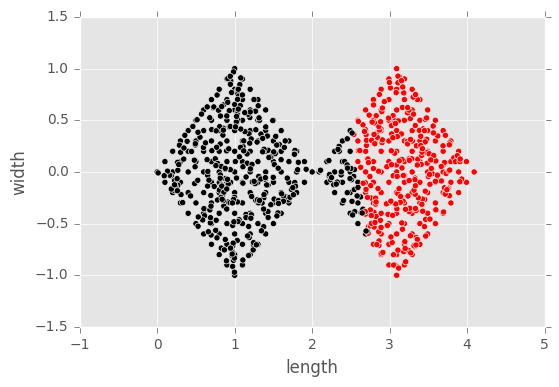

In [11]:
kmeans = KMeans(2)
kmeans.fit(realdata)

new_data = pd.DataFrame(kmeans.get_data(),columns = ['length','width','cluster'])
new_data.cluster = new_data.cluster.astype(int)

cmap = ['red', 'black', 'blue', 'brown', 'green']
colors = [cmap[i] for i in new_data['cluster']]

new_data.plot.scatter(x = 'length', y = 'width', c = colors)

### Problem1: cluster = 2 best I have ever got using random initial point

finish


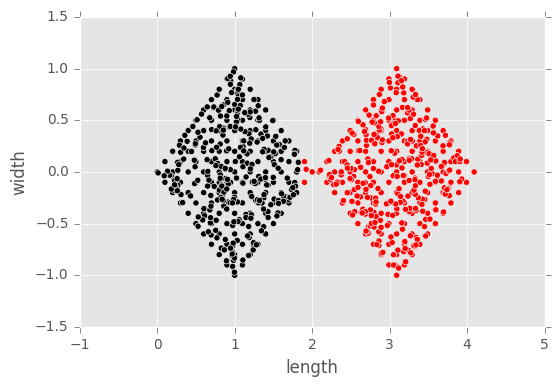

In [17]:
kmeans.fit(realdata)

new_data = pd.DataFrame(kmeans.get_data(),columns = ['length','width','cluster'])
new_data.cluster = new_data.cluster.astype(int)

new_data.plot.scatter(x = 'length', y = 'width', c = colors)

### Problem1: cluster = 2 more worse result

finish


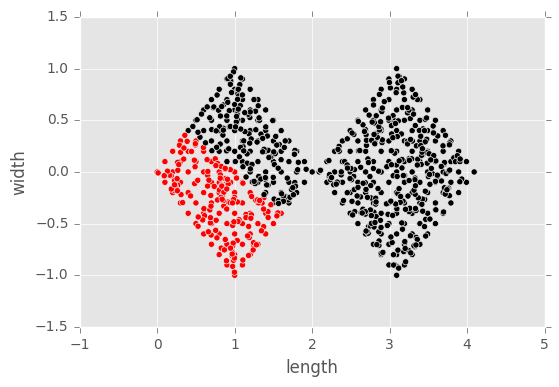

In [19]:
kmeans.fit(realdata)

new_data = pd.DataFrame(kmeans.get_data(),columns = ['length','width','cluster'])
new_data.cluster = new_data.cluster.astype(int)

new_data.plot.scatter(x = 'length', y = 'width', c = colors)

### Findings: The result of k-means are different from each other because of different initial points